This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** October 2024
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FREE-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and the free-boundary problem CASE, the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
PREPARE OUTPUT DIRECTORY...Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Total plasma current computed =  -26308350.97652715
Total plasma current normalization factor =  0.5701611634033356
Normalised total plasma current =  -15000000.0
Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


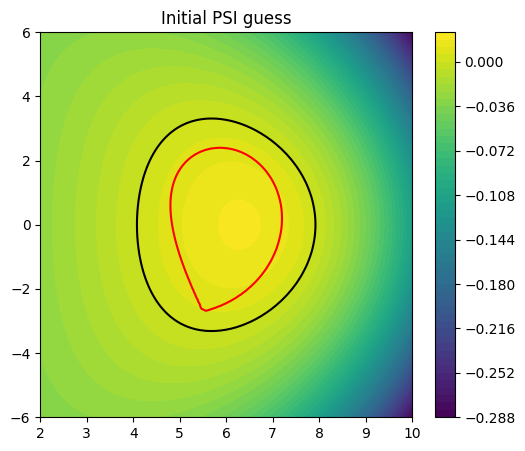

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.07845885 0.15007953]  (ELEMENT  3075 ) WITH VALUE PSI_0 =  [10.75411645]
SADDLE POINT AT  [ 4.51939655 -3.61183926]  (ELEMENT  1696 ) WITH VALUE PSI_X =  [-5.73298406]


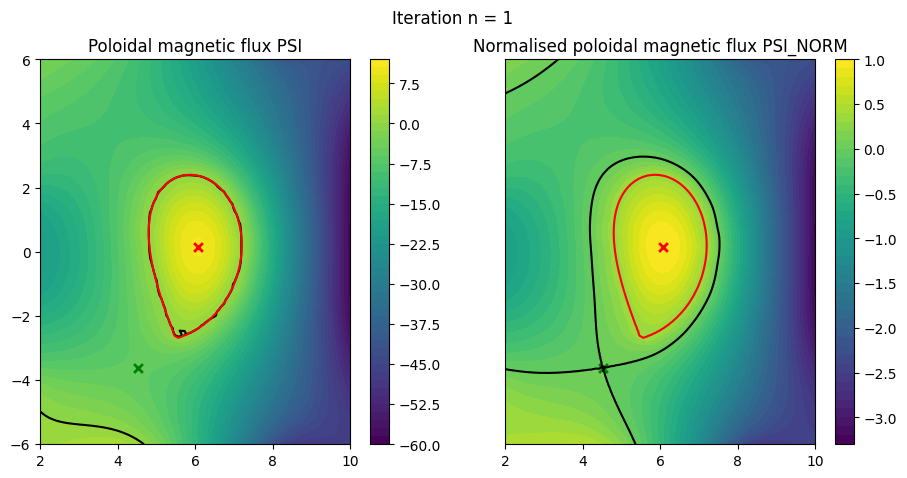

Internal iteration =  1 , PSI_NORM residu =  0.9552222211238918
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.98449111 0.12020862]  (ELEMENT  3075 ) WITH VALUE PSI_0 =  [873.04343372]
SADDLE POINT AT  [ 4.48931209 -3.5390737 ]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.71666398]


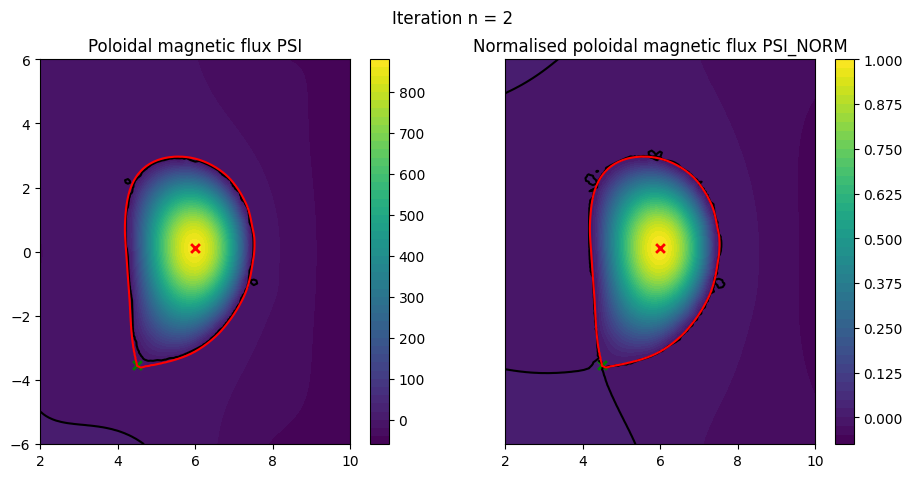

Internal iteration =  2 , PSI_NORM residu =  5.664639071361825
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.94338266 0.08493532]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [876.50947582]
SADDLE POINT AT  [ 4.49170353 -3.53785184]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.70462223]


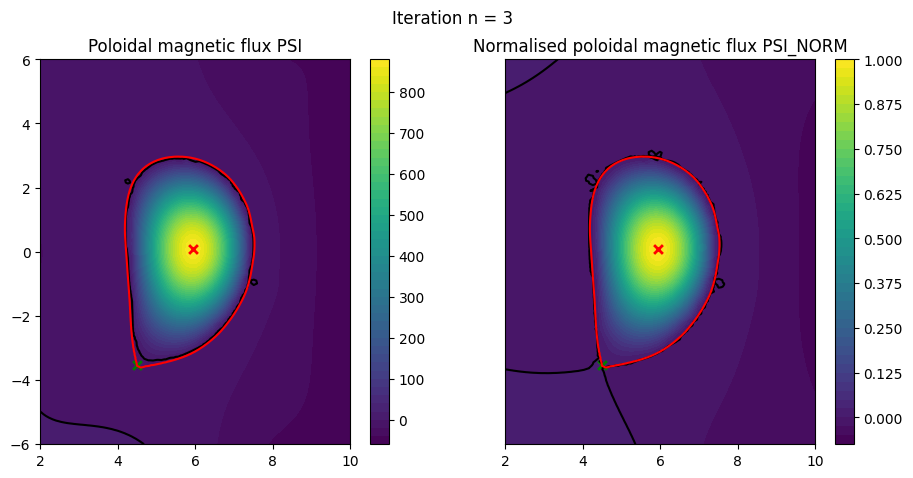

Internal iteration =  3 , PSI_NORM residu =  0.03324499370792356
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f909cabd510>>
Traceback (most recent call last):
  File "/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_FEMCutFEM/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


LOCAL EXTREMUM AT  [5.92969049 0.06491355]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [873.67696821]
SADDLE POINT AT  [ 4.49205641 -3.53767605]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.69331608]


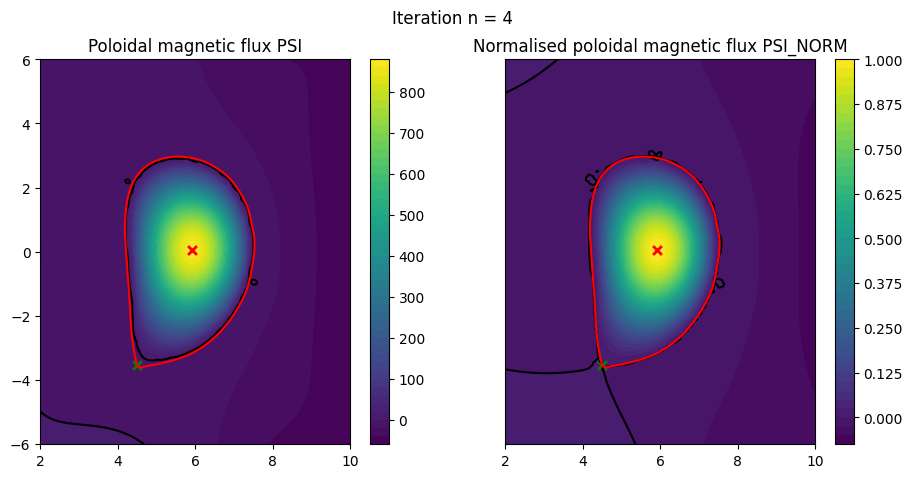

Internal iteration =  4 , PSI_NORM residu =  0.011265007652547603
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!


KeyboardInterrupt: 

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovFEMCutFEM import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI03-COARSE'
#MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM'
#MESH = 'TS-FEMCUTFEM-TRI03-FINE'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI06-COARSE'
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM'
#MESH = 'TS-FEMCUTFEM-TRI06-FINE'

###### LINEAR TRIANGULAR ELEMENT ENLARGED MESH
#MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI03-INTERMEDIATE-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI03-FINE-ENLARGED'

###### QUADRATIC TRIANGULAR ELEMENT ENLARGED MESH
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI06-INTERMEDIATE-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI06-FINE-ENLARGED'

# RECTANGULAR MESH
#MESH = 'TS-FEMCUTFEM-TRI03-FINE-RECTANGLE'
MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM-RECTANGLE'

### SELECT SOLUTION CASE FILE:
#CASE = 'TS-FREE-PROFILES-ORIG'       
#CASE = 'TS-FREE-PROFILES-2'
#CASE = 'TS-FREE-PROFILES-3'

CASE = 'TS-FREE-PROFILES-RECTANGLE'

##############################################################

## CREATE GRAD-SHAFRANOV PROBLEM 
Problem = GradShafranovFEMCutFEM(MESH,CASE)
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.GhostPenalty = True
##### OUTPUT PLOTS IN RUNTIME
Problem.plotElemsClassi_output = False        # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI_output = True                 # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.PARAMS_output = False                  # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.PSI_output = True                     # OUTPUT SWITCH FOR PSI FIELD VALUES OBTAINED BY SOLVING THE CutFEM SYSTEM
Problem.PSIcrit_output = True                 # OUTPUT SWITCH FOR CRITICAL PSI VALUES
Problem.PSI_NORM_output = True                # OUTPUT SWITCH FOR THE PSI_NORM FIELD VALUES (AFTER NORMALISATION OF PSI FIELD)
Problem.PSI_B_output = True                   # OUTPUT SWITCH FOR PSI_B BOUNDARY VALUES
Problem.RESIDU_output = False                  # OUTPUT SWITCH FOR RESIDU FOR EACH ITERATION
Problem.ElementsClassi_output = True          # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.PlasmaLevSetVals_output = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.L2error_output = False                 # OUTPUT SWITCH FOR ERROR FIELD AND THE L2 ERROR NORM FOR THE CONVERGED SOLUTION 
Problem.ELMAT_output = False                  # OUTPUT SWITCH FOR ELEMENTAL MATRICES

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI()